In [2]:
import numpy as np
import pandas as pd
import scanpy as sc

In [3]:
from matplotlib.pyplot import rc_context
#import besca as bc
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "vscode"

In [8]:
adata = sc.read("/Users/stefano.cardinale/scDEAL/scDEAL/saved/adata/GSE110894_I-BET-762.h5ad")
print(adata)

AnnData object with n_obs × n_vars = 1419 × 6644
    obs: 'Plate#', 'Well position', 'Sample name', 'Index-Sort condition', 'Well index', 'sensitive', 'sensitivity', 'Sensitive_score', 'Resistant_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt-', 'pct_counts_mt-', 'total_counts_rps', 'pct_counts_rps', 'total_counts_rpl', 'pct_counts_rpl', 'leiden', 'leiden_origin', 'sens_preds_pret', 'sens_label_pret', 'sens_preds', 'sens_label', 'rest_preds'
    var: 'n_cells', 'mt-', 'rps', 'rpl', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_pre', 'X_umap', 'X_umap_origin'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [29]:
adata.uns['umap']

{'params': {'a': 0.5830300205483709, 'b': 1.334166992455648}}

In [9]:
adata.obs['pred_group'] = ['Resistant' if int(i) == 0 else 'Sensitive' for i in adata.obs['sens_label']]

df=adata.obs
frac = 0.8
idx = df.loc[df['sensitivity'] == 'Sensitive'].index.values
idx2 = np.random.choice(idx, int(len(idx)*frac), replace=False).tolist()
df.loc[df.index.isin(idx2), 'pred_group'] = 'Sensitive'
df.loc[~df.index.isin(idx2), 'pred_group'] = 'Resistant'
#print(df.loc[df['sensitivity'] == 'Sensitive', ['sensitivity', 'pred_group']])

frac2 = 0.1
idx3 = df.loc[df['sensitivity'] == 'Resistant'].index.values
idx4 = np.random.choice(idx3, int(len(idx3)*frac2), replace=False).tolist()
df.loc[df.index.isin(idx4), 'pred_group'] = 'Sensitive'

In [32]:
adata

AnnData object with n_obs × n_vars = 1419 × 6644
    obs: 'Plate#', 'Well position', 'Sample name', 'Index-Sort condition', 'Well index', 'sensitive', 'sensitivity', 'Sensitive_score', 'Resistant_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt-', 'pct_counts_mt-', 'total_counts_rps', 'pct_counts_rps', 'total_counts_rpl', 'pct_counts_rpl', 'leiden', 'leiden_origin', 'sens_preds_pret', 'sens_label_pret', 'sens_preds', 'sens_label', 'rest_preds', 'pred_group'
    var: 'n_cells', 'mt-', 'rps', 'rpl', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'Sample name_colors', 'sensitivity_colors', 'pred_group_colors'
    obsm: 'X_pca', 'X_pre', 'X_umap', 'X_umap_origin'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [33]:
adata.obs.head()

,Plate#,Well position,Sample name,Index-Sort condition,Well index,sensitive,sensitivity,Sensitive_score,Resistant_score,n_genes,...,total_counts_rpl,pct_counts_rpl,leiden,leiden_origin,sens_preds_pret,sens_label_pret,sens_preds,sens_label,rest_preds,pred_group
RPI1_A3,RPI1,A3,MA9 IBET RESISTANT CELLS,GR+,GGTCTATG,0,Resistant,-2.726364,14.205806,7132,...,0.0,0.0,4,4,0.024760,0,0.006669,0,0.989948,Resistant
RPI1_A4,RPI1,A4,MA9 IBET RESISTANT CELLS,GR+,GTCCGAAT,0,Resistant,-2.200808,10.421613,6815,...,0.0,0.0,4,4,0.014649,0,0.005418,0,0.991507,Resistant
RPI1_A5,RPI1,A5,MA9 IBET RESISTANT CELLS,GR+,TAGTGCGT,0,Resistant,-1.273636,5.788548,4951,...,0.0,0.0,4,4,0.006290,0,0.000771,0,0.998432,Resistant
RPI1_A6,RPI1,A6,MA9 IBET RESISTANT CELLS,GR+,GACTGTAC,0,Resistant,-3.492323,16.025484,7615,...,0.0,0.0,4,4,0.064497,0,0.007639,0,0.989538,Resistant
RPI1_A7,RPI1,A7,MA9 IBET RESISTANT CELLS,GR+,TCCAGTAG,0,Resistant,-2.236667,13.070161,6688,...,0.0,0.0,4,4,0.023933,0,0.003179,0,0.994605,Resistant


In [37]:
#test2 = sc.tl.rank_genes_groups(adata, 'total_counts')

In [35]:
plotdf = sc.get.obs_df(
        adata,
        keys=["Resistant_score", "sensitivity"],
        obsm_keys=[("X_umap", 0), ("X_umap", 1)]
    )

In [36]:
plotdf

,Resistant_score,sensitivity,X_umap-0,X_umap-1
RPI1_A3,14.205806,Resistant,0.498687,-4.150733
RPI1_A4,10.421613,Resistant,-0.039570,-3.913997
RPI1_A5,5.788548,Resistant,0.492289,-2.651699
RPI1_A6,16.025484,Resistant,0.924282,-2.707850
RPI1_A7,13.070161,Resistant,-0.258465,-5.802596
...,...,...,...,...
RPI7_P18,8.079032,Resistant,1.676437,1.296983
RPI7_P19,8.462097,Resistant,1.579555,1.377816
RPI7_P20,5.184032,Resistant,2.359969,-0.053222
RPI7_P21,1.591129,Sensitive,2.554729,0.136436


In [50]:
fig = px.scatter(
    plotdf, x='X_umap-0', y='X_umap-1',
    color='sensitivity',
    labels={'color': 'sensitivity'},
    width=600, height=400,
)
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
'font_color':'white'
})
fig.show(renderer='notebook_connected')

In [66]:
adata.obs.head()

,Plate#,Well position,Sample name,Index-Sort condition,Well index,sensitive,sensitivity,Resistant_score,Sensitive_score,n_genes,...,leiden,leiden_origin,sens_preds_pret,sens_label_pret,sens_preds,sens_label,rest_preds,resistant_score,pred_groups,resistant_score_pred
RPI1_A3,RPI1,A3,MA9 IBET RESISTANT CELLS,GR+,GGTCTATG,0,Resistant,14.205806,-2.726364,7132,...,4,4,0.000088,0,0.000093,0,0.999912,1.093515,pred_res,-0.019291
RPI1_A4,RPI1,A4,MA9 IBET RESISTANT CELLS,GR+,GTCCGAAT,0,Resistant,10.421613,-2.200808,6815,...,4,4,0.000932,0,0.000131,0,0.999882,0.989104,pred_res,0.009188
RPI1_A5,RPI1,A5,MA9 IBET RESISTANT CELLS,GR+,TAGTGCGT,0,Resistant,5.788548,-1.273636,4951,...,4,4,0.000008,0,0.000067,0,0.999943,0.926238,pred_res,0.056341
RPI1_A6,RPI1,A6,MA9 IBET RESISTANT CELLS,GR+,GACTGTAC,0,Resistant,16.025484,-3.492323,7615,...,4,4,0.000036,0,0.000080,0,0.999922,1.076066,pred_res,0.027159
RPI1_A7,RPI1,A7,MA9 IBET RESISTANT CELLS,GR+,TCCAGTAG,0,Resistant,13.070161,-2.236667,6688,...,4,4,0.000049,0,0.000112,0,0.999897,1.136625,pred_res,0.098587


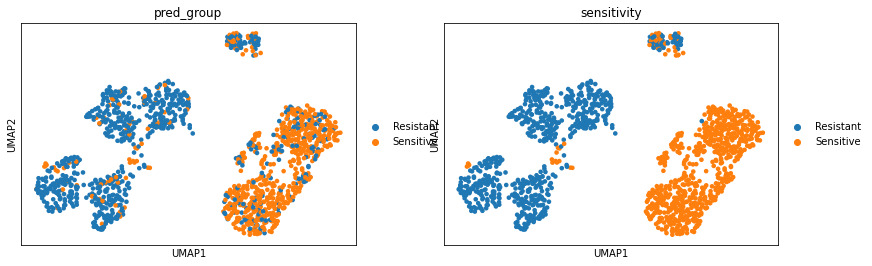

In [27]:
sc.pl.umap(adata, color=['pred_group', 'sensitivity'],  wspace=0.15)

In [ ]:
fig = px.scatter(
    adata., x=0, y=1,
    color=digits.target.astype(str), labels={'color': 'digit'}
)
fig.show()

In [21]:
adata.uns

OverloadedDict, wrapping:
	{'hvg': {'flavor': 'seurat'}, 'leiden': {'params': {'n_iterations': -1, 'random_state': 0, 'resolution': 0.3}}, 'neighbors': {'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'method': 'umap', 'metric': 'euclidean', 'n_neighbors': 10, 'random_state': 0}}, 'pca': {'params': {'use_highly_variable': True, 'zero_center': True}, 'variance': array([114.245804 ,  39.424213 ,  27.352665 ,  14.946104 ,  11.021259 ,
         9.042466 ,   8.132845 ,   7.6877403,   6.2516875,   5.4230156,
         4.8588924,   4.8290787,   4.689091 ,   3.884813 ,   3.6360629,
         3.4265816,   3.374033 ,   3.2438169,   3.160333 ,   3.1168334,
         3.098907 ,   3.0727022,   3.026065 ,   3.0186305,   3.0116768,
         2.9666924,   2.9610915,   2.9564955,   2.9131866,   2.8847368,
         2.8556418,   2.851375 ,   2.8139029,   2.7947612,   2.7886658,
         2.7666826,   2.758159 ,   2.749331 ,   2.7119076,   2.7068443,
         2.695211 ,   2.680

In [26]:
import plotly.express as px

fig=px.scatter(adata.uns['umap'])
fig.show(renderer='notebook_connected')

In [25]:
from plotly.figure_factory import create_2d_density
fig = create_2d_density(adata.obs['Sensitive_score'], adata.obs['sens_preds'])
fig.show()

TypeError: plot got an unexpected keyword argument 'x'

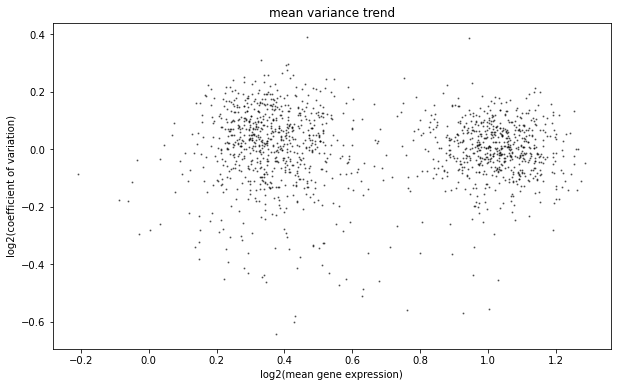

In [65]:
#generate plot
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x = adata.obs['resistant_score'], y = adata.obs['resistant_score_pred'], alpha = 0.5, s=1, color = 'black')
ax.set_xlabel('log2(mean gene expression)')
ax.set_ylabel('log2(coefficient of variation)')
ax.set_title('mean variance trend')
ax.plot(x = adata.obs['Sensitive_score'], y = adata.obs['sens_preds'], color = 'red', linestyle = 'dashed', label="linear regression")
ax.legend()

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(adata.obs['sensitive'], adata.obs['sens_label'])

0.46370683579985905

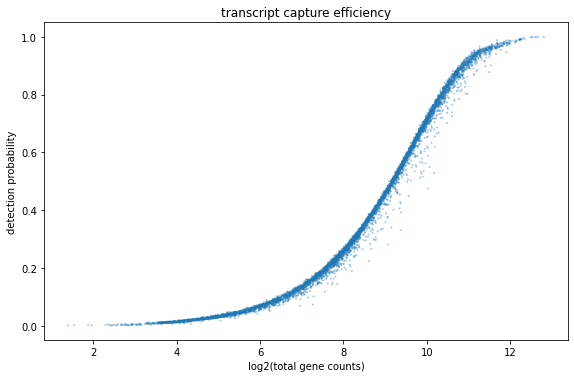

In [10]:
fig, ax = plt.subplots(1)
fig.set_figwidth(8)
fig.set_figheight(5)
fig.tight_layout()

bc.pl.transcript_capture_efficiency(adata,ax=ax)

In [16]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

AttributeError: 'ArrayView' object has no attribute 'A1'

KeyError: 'CD79A'

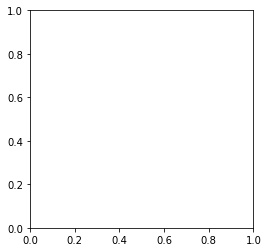

In [6]:
# rc_context is used for the figure size, in this case 4x4
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='CD79A')